In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso, LogisticRegression  #  For regression in Machine Learning
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
f2 = {"family":"cambria","color":"g","size":50}
f3  = {"family":"cambria","color":"k","size":40}
f1 = {"family":"cambria","color":"r","size":30}

# Random forest is best model in dataset in this ML Project

In [2]:
df = pd.read_csv(r"C:\Users\Sinha Rahul\Downloads\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Display Top 10 row in dataset

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Display last 10 row in dataset

In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Find the shape of our dataset(number of column & number of row)

In [5]:
df.shape

(10000, 14)

In [6]:
print("number of row is", df.shape[0])
print("number of column is",df.shape[1])

number of row is 10000
number of column is 14


In [7]:
df.size

140000

# Getting information about our dataset likes total number of rows, total number of columns,data type of each column and memory requirement


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.6 MB


# check the null value in our dataset

In [10]:
df.isnull().values.any()

False

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
print("total null value is ",df.isnull().sum().sum())

total null value is  0


# Get overall statistics about the dataset

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [15]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


# dropping irrelevent columns 

In [16]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# correlation dataset

In [18]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


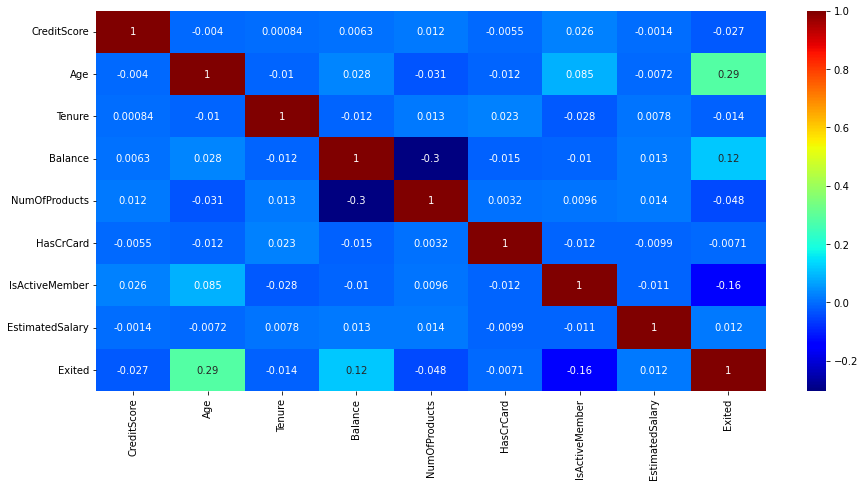

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap="jet")
plt.show()

# Encoding categorical dataset

In [20]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [21]:
df["Geography"].nunique()

3

In [22]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [23]:
df["Gender"].nunique()

2

In [24]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Non Handling Imbalanced

In [26]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [27]:
df["Exited"].value_counts().reset_index()

,index,Exited
0,0,7963
1,1,2037


In [28]:
df["Exited"].value_counts().reset_index().rename(columns = {"index":"Exited",
                                                 "Exited":"count"})

,Exited,count
0,0,7963
1,1,2037


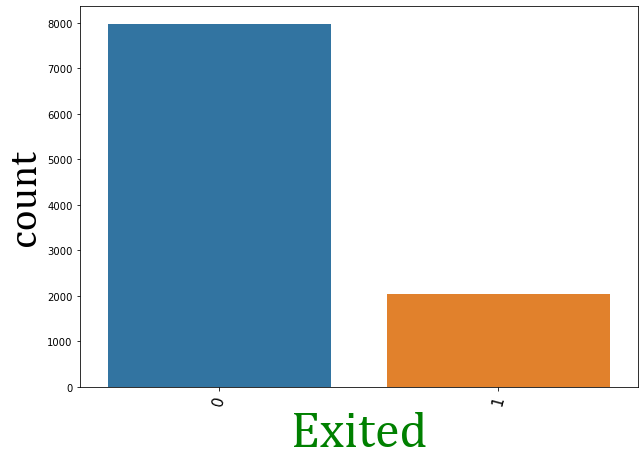

In [29]:
plt.figure(figsize = (10,7))
sns.barplot(x = "Exited", y = "count", data = df["Exited"].value_counts().reset_index().rename(columns = {"index":"Exited",
                                                 "Exited":"count"}))
plt.xlabel("Exited",fontdict=f2)
plt.ylabel("count",fontdict=f3)
plt.xticks(rotation = 75,fontsize=15)
plt.show()

In [30]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df["Exited"]==0)] 
df_minority = df[(df["Exited"]==1)]

In [31]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 7963, # to match majority class
                                 random_state=42)  # reproducible results

In [32]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
5363,771,51,5,135506.58,3,1,1,152479.64,1,0,1,1
7088,556,54,4,150005.38,1,1,0,157015.50,1,0,0,0
4076,672,50,1,0.00,1,1,0,12106.82,1,0,0,0
6255,547,55,4,111362.76,3,1,0,16922.28,1,1,0,1
5371,712,33,3,153819.58,1,1,0,79176.09,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,644,28,7,155060.41,1,1,0,29179.52,0,0,0,1
9994,800,29,2,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1


In [33]:
df_upsampled ["Exited"].value_counts().reset_index().rename(columns = {"index":"Exited",
                                                 "Exited":"count"})

,Exited,count
0,1,7963
1,0,7963


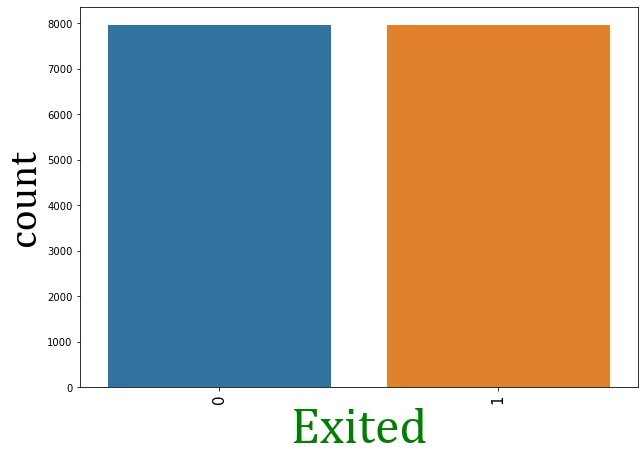

In [34]:
plt.figure(figsize = (10,7))
sns.barplot(x = "Exited", y = "count", data = df_upsampled ["Exited"].value_counts().reset_index().rename(columns = {"index":"Exited",
                                                 "Exited":"count"}))
plt.xlabel("Exited",fontdict=f2)
plt.ylabel("count",fontdict=f3)
plt.xticks(rotation = 90,fontsize=15)
plt.show()

In [35]:
x = df_upsampled .drop("Exited",axis = 1)
y = df_upsampled ["Exited"]

In [36]:
y

5363    1
7088    1
4076    1
6255    1
5371    1
       ..
9993    0
9994    0
9995    0
9996    0
9999    0
Name: Exited, Length: 15926, dtype: int64

In [37]:
x.shape

(15926, 11)

In [38]:
y.shape

(15926,)

# splitting dataset into the training set and test set

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.6,random_state = 40)

# Feature scalling

In [40]:
sc = StandardScaler()

In [41]:
x_train = sc.fit_transform(x_train,y_train)
x_test = sc.transform(x_test)

In [42]:
x_train

array([[-1.62606049, -0.21267589,  1.39165449, ..., -0.6816924 ,
         1.85030028, -1.01200296],
       [ 0.50557519, -0.30793961,  0.36630394, ...,  1.46693728,
        -0.54045282, -1.01200296],
       [ 0.87274688, -0.68899451, -0.65904662, ...,  1.46693728,
        -0.54045282,  0.98813941],
       ...,
       [-0.25936585,  0.07311528,  1.39165449, ..., -0.6816924 ,
         1.85030028,  0.98813941],
       [-0.64693597, -0.59373079, -1.00083014, ..., -0.6816924 ,
        -0.54045282, -1.01200296],
       [ 0.64836418, -0.87952196, -1.34261366, ..., -0.6816924 ,
        -0.54045282, -1.01200296]])

In [43]:
x_test

array([[ 1.18892251, -1.64163175,  0.70808746, ..., -0.6816924 ,
        -0.54045282, -1.01200296],
       [-1.92183769,  0.07311528,  0.36630394, ..., -0.6816924 ,
         1.85030028, -1.01200296],
       [-0.16757292,  0.45417018,  1.73343801, ..., -0.6816924 ,
         1.85030028, -1.01200296],
       ...,
       [-0.35115877,  0.9304888 ,  0.70808746, ...,  1.46693728,
        -0.54045282, -1.01200296],
       [-2.05442747,  0.35890645,  1.73343801, ..., -0.6816924 ,
         1.85030028, -1.01200296],
       [-0.87131867,  0.9304888 , -1.34261366, ..., -0.6816924 ,
        -0.54045282, -1.01200296]])

# Logistic Regression

In [44]:
log = LogisticRegression() 

In [95]:
logist = log.fit(x_train,y_train)
logist

LogisticRegression()

In [46]:
y_predi = log.predict(x_test)
y_predi

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [47]:
accuracy_score(y_test,y_predi)

0.7036416910841357

In [48]:
accuracy_score(y_test,y_predi,normalize=True)

0.7036416910841357

In [49]:
 precision_score(y_test,y_predi)

0.7036637931034483

In [50]:
recall_score(y_test,y_predi, average='binary')

0.69144430326133

In [51]:
recall_score(y_test,y_predi, average="macro")

0.7035003891151499

In [52]:
f1_score(y_test,y_predi)

0.6975005340739158

In [53]:
f1_score(y_test,y_predi,average='binary')

0.6975005340739158

In [54]:
f1_score(y_test,y_predi,average='micro',pos_label=1)

0.7036416910841357

In [55]:
f1_score(y_test,y_predi,average='macro',pos_label=1)

0.7035194978061886

# SVC

In [56]:
model = SVC()
model

SVC()

In [57]:
model.fit(x_train,y_train)

SVC()

In [58]:
mod_pred = model.predict(x_train)
mod_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
model.score(x_train,y_train)

0.8087912087912088

In [60]:
model.score(x_test,y_test)

0.7988698200083717

# Tune Parameter

# 1. Regulazation(C)

In [61]:
model_c = SVC(C = 1)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.7988698200083717

In [62]:
model_c = SVC(C = 10)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.8129970699037254

# 2.Gamma

In [63]:
model_c = SVC(gamma = 1)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.8682503139388865

In [64]:
model_c = SVC(gamma = 100)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.9069694432817078

# 3.kernal

In [65]:
model_linear_kernal = SVC(kernel = "linear")
model_linear_kernal.fit(x_train,y_train)
model_linear_kernal.score(x_test,y_test)

0.7130598576810381

In [66]:
model_linear_kernal = SVC(kernel = "poly")
model_linear_kernal.fit(x_train,y_train)
model_linear_kernal.score(x_test,y_test)

0.7836961071578066

In [67]:
model_linear_kernal = SVC(kernel = "sigmoid")
model_linear_kernal.fit(x_train,y_train)
model_linear_kernal.score(x_test,y_test)

0.538509836751779

In [68]:
model_linear_kernal = SVC(kernel = "rbf")
model_linear_kernal.fit(x_train,y_train)   # defult parameter is rbf
model_linear_kernal.score(x_test,y_test)

0.7988698200083717

# kneighbors classifier

In [69]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [70]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
knn_pred = knn.predict(x_test)
knn_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [72]:
accuracy_score(y_test,knn_pred)

0.7697781498534952

In [73]:
precision_score(y_test,knn_pred)

0.7513955342902712

# classification_report

In [74]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      4834
           1       0.75      0.80      0.77      4722

    accuracy                           0.77      9556
   macro avg       0.77      0.77      0.77      9556
weighted avg       0.77      0.77      0.77      9556



# Decision Tree classifier

In [75]:
dt = DecisionTreeClassifier()
model

SVC()

In [76]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
dt.score(x_train,y_train)

1.0

In [78]:
dt.score(x_test,y_test)

0.867831728756802

In [79]:
y_pred  = dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [80]:
accuracy_score(y_test,y_pred)

0.867831728756802

In [81]:
precision_score(y_test,y_pred)

0.8260131950989632

# Random forest classifer

In [82]:
rf = RandomForestClassifier(n_estimators= 20)
model

SVC()

In [83]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [84]:
model_pred = rf.predict(x_test)
model_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [85]:
rf.score(x_train,y_train)

0.9990580847723705

In [86]:
rf.score(x_test,y_test)

0.9080159062369192

In [87]:
precision_score(y_test,model_pred)

0.8888888888888888

In [88]:
accuracy_score(y_test,model_pred)

0.9080159062369192

# model performance

In [89]:
final_data = pd.DataFrame({"model":["log","knn","dt","rf"],
                          "ACC":[accuracy_score(y_test,y_predi),
                                accuracy_score(y_test,knn_pred),
                                accuracy_score(y_test,y_pred),
                               accuracy_score(y_test,model_pred)]})

In [90]:
final_data

,model,ACC
0,log,0.703642
1,knn,0.769778
2,dt,0.867832
3,rf,0.908016


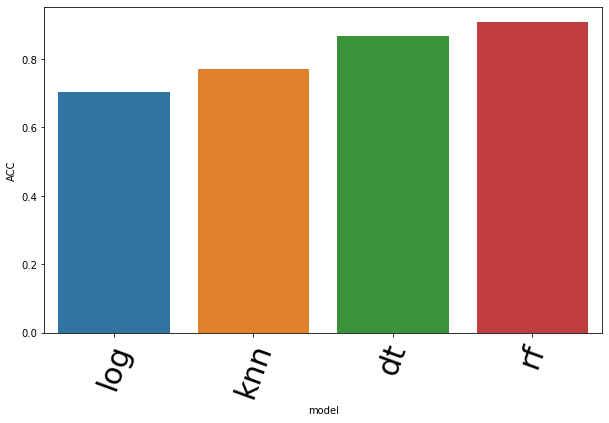

In [91]:
plt.figure(figsize = (10,6))
sns.barplot(final_data["model"],final_data['ACC'])
plt.xticks(rotation = 70,fontsize=30)
plt.show()

In [92]:
final_data = pd.DataFrame({"model":["log","knn","dt","rf"],
                          "prs":[precision_score(y_test,y_predi),
                               precision_score(y_test,knn_pred),
                                precision_score(y_test,y_pred),
                               precision_score(y_test,model_pred)]})

In [93]:
final_data.sort_values(by = "prs",ascending=False)

,model,prs
3,rf,0.888889
2,dt,0.826013
1,knn,0.751396
0,log,0.703664


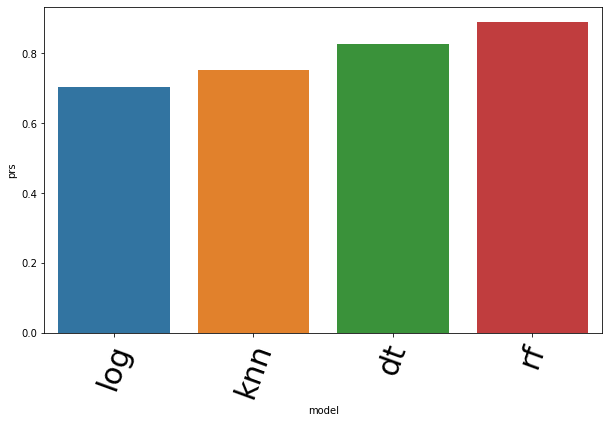

In [94]:
plt.figure(figsize = (10,6))
sns.barplot(final_data["model"],final_data['prs'])
plt.xticks(rotation = 70,fontsize=30)
plt.show()